# HW1 problems

## Question 1: $\pi^0$ Decay

### Learning objectives
In this question you will:

- Review basic concepts of Special Relativity and Lorentz Boosts
- Apply these concepts to the case of $\pi^0\rightarrow \gamma \gamma$ decay
- Learn techniques needed to simulate the decay of an ensemble of  $\pi^0$s with non-zero momentum


*Adapted from Perkins $4^{th}$ Edition Problem 1.4*

In this problem you will derive an expression for the distribution of photon energies produced in the decays of $\pi^0$s that are moving with fixed momentum.  Then, you will learn how to create a simulated sample of such $\pi^0$ decays.   Note: In this problem, we will use natural units where $\hbar=c=1$.

### 1a. 

A particle beam consists of $\pi^0$'s all with energy $E_{lab}$ and all traveling in the $+z$ direction. Find an expression for the energy of the photons produced from the $\pi^0$ decays as a function of $m_\pi$, $E_{lab}$ and $\theta^*$ (the angle of emission  of the  photon with respect to the $z$-axis in the pion rest frame).  Using this expression, show that the lab energy spectrum of the photons is flat, extending from $E_{lab}\left (1+\beta \right )/2$ to $E_{lab}\left (1-\beta \right )/2$, where $\beta$ is the velocity of the $\pi^0$ in the lab frame.

Write your answer here

### 1b. 

Find an expression for the disparity $D$ (the ratio of the energy of the higher energy photon to the energy of the lower energy) and show that in the relativistic limit $\beta\approx 1$, $D>3$ in half the decays and $D>7$ in one quarter

Write your answer here

### 1c. 

It is often useful for physicists to simulate experimental data.  Such simulations allow us generate an ensemble of events corresponding to a given physical process and to study them.  Generated events can be passed through a simulated detector that has imperfections (finite resolution, missing channels, incomplete angular coverage, etc) and the effect of such imperfections on our measurements can be assessed.  This problem is our first example of creating such simulated data.  Our simulation will be quite simple but the concepts developed here will be used through the semester.

Assume we have a beam of 10000 $\pi^0$ all with energy 5 GeV.  Simulate the decay of these pions and plot (histogram) the following distributions:
- The energies of the photons produced in the $\pi^0$ decay
- The disparity of the decays
- The angles $\theta$ between the momenta of the photons and that of the $\pi^0$ in the lab frame.

Notes:
- Make sure the given function implements what's defined in the documentation
- You can add more functions for intermediate steps if you want
- Zeros or arrays of zeros are placeholders for your code
    
Hints: 
- For each decay, first simulate the decay in the pion center of mass and then Lorentz boost to the lab frame 
- Since in the rest frame of the pion, the decay is isotropic, the distribution of $\cos \theta^*$ is uniformly distributed.  If for each event you pull a random number uniformly distributed between 0 and 1 and set $\cos \theta^* $ for that event equal to the random number, the decays will have the right distribution.
- In principle, you could find the $\phi^*$ angle for each decay by pulling a second uniformly distributed random number, but for this problem you will not need the $x$ and $y$ components of the photon momentum separately so you don't need to do this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def piZeroDecay(piEnergy, nevents):
    """Compute the lab-frame energies and angles of pi^0 decay photons. 
    Randomly picks cos(Theta*) for the pi^0 decays and then boosts the 
    photons from the pi^0 rest frame to the lab frame.
    
    Parameters
    ==========
    piEnergy : float
      the energy of the pi^0 in the lab frame in GeV
      
    nevents : int
      number of decays to simulate
      
    Returns
    =======
    Elab1 : array
      1-d array of length nevents representing higher-energy photon lab 
      frame energies
      
    Elab2 : array
      1-d array of length nevents representing lower-energy photon lab 
      frame energies
      
    ThetaLab1 : array
      1-d array of length nevents representing angles (in radians) between 
      higher-energy photon and pi^0 momenta
      
    ThetaLab2 : array
      1-d array of length nevents representing angles (in radians) between 
      lower-energy photon and pi^0 momenta
    """
    Elab1 = np.zeros(nevents)
    Elab2 = np.zeros(nevents)
    
    ThetaLab1 = np.zeros(nevents)
    ThetaLab2 = np.zeros(nevents)
    
    return Elab1, Elab2, ThetaLab1, ThetaLab2    

Text(0.5,1,'Photon Energy in Lab Frame for 0.0 GeV $\\pi^0$ Decays')

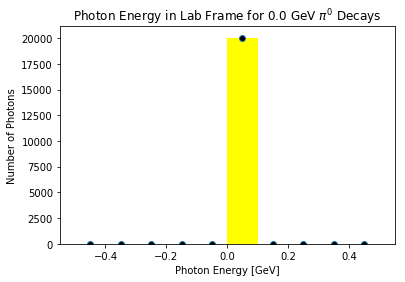

In [3]:
requestedEnergy = 0.  # energy in GeV
nevents = 10000        # number of events to simulate

E1, E2, ThetaLab1, ThetaLab2 = piZeroDecay(requestedEnergy, nevents)
gammaEnergy = np.concatenate((E1,E2)) #array of photon energies
disparity = np.zeros(nevents)

# Note: We've provided you with the plotting code on this first assignment
# Fill the histogram.  The hist function returns entries per bin, 
# bin boundaries and the objects representing the plotted patches
n, bins, patchs = plt.hist(gammaEnergy,bins=10,range=(0.0,requestedEnergy),facecolor='yellow')

# The code below draws error bars with size sqrt(number of events)
bin_centers = 0.5*(bins[1:] + bins[:-1])
plt.errorbar(bin_centers,n,xerr=None,yerr=n**0.5,fmt='o',ecolor='black',markerfacecolor='black')

# Label the x and y axes and add a title
plt.xlabel('Photon Energy [GeV]')
plt.ylabel('Number of Photons')
name = "Photon Energy in Lab Frame for "+str(requestedEnergy)+r" GeV $\pi^0$ Decays"
plt.title(name)

Text(0.5,1,'Disparity for 0.0 GeV $\\pi^0$ Decays')

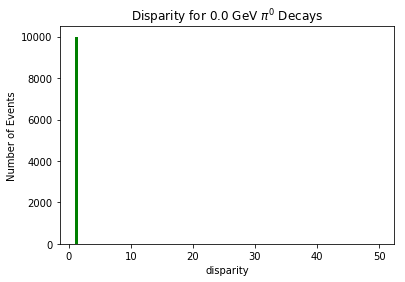

In [4]:
# Fill the histogram.  Note: np.clip() makes the last bin an overflow bin
maxRange=50
plt.hist(np.clip(disparity,1.0,maxRange),bins=100,range=(1.0,maxRange),facecolor='green')
# Label the x and y axes and add a title
plt.xlabel('disparity')
plt.ylabel('Number of Events')
name = "Disparity for "+str(requestedEnergy)+r" GeV $\pi^0$ Decays"
plt.title(name)

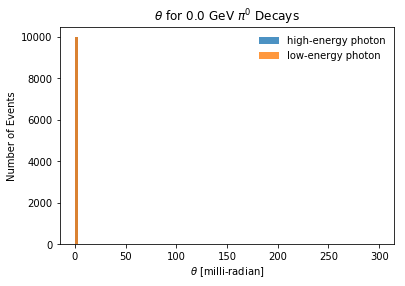

In [6]:
# Fill the histogram.  Note: np.clip() makes the last bin an overflow bin

# Convert radians to milli-radians for easier plotting
plt.hist(ThetaLab1*1e3,bins=100,range=(0,300),alpha=0.8,label="high-energy photon")
plt.hist(ThetaLab2*1e3,bins=100,range=(0,300),alpha=0.8,label="low-energy photon")

# Label the x and y axes and add a title
plt.xlabel(r'$\theta$ [milli-radian]')
plt.ylabel('Number of Events')
name = r"$\theta$ for "+str(requestedEnergy)+r" GeV $\pi^0$ Decays"
plt.title(name)
plt.legend(frameon=False)

### 1d. 

Modify your simulation so that instead of having a fixed energy beam, the $\pi^0$ energy is uniformly distributed between 1 and 20 GeV.  Make a 2D histogram of the opening angle between the two photons (measured in milli-radians) as a function of the $\pi^0$ energy.

Text(0.5,1,'Opening Angle for 0.0 to 0.0 GeV $\\pi^0$ Decays')

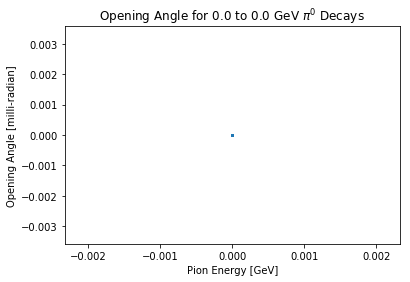

In [7]:
bounds = 0,0 #range of pion energies

energies = np.zeros(nevents)
E1, E2, ThetaLab1, ThetaLab2 = piZeroDecay(energies,nevents)

#since the photons must have opposite phi, the angle between them is the sum of their thetas
openingAngles = (ThetaLab1+ThetaLab2)*1e3


plt.scatter(energies,openingAngles,s=2) # s controls the size of the points that are draw.                                                               
plt.xlabel('Pion Energy [GeV]')
plt.ylabel('Opening Angle [milli-radian]')
name = r"Opening Angle for %.1f to %.1f GeV $\pi^0$ Decays"%bounds
plt.title(name)

### 1e. 

In the ATLAS detector, photons are identifed in the electromagnetic calorimeter by looking for a narrow energy cluster. Assume that two photons will be *merged* into a single cluster if their opening angles differ by less than 75 milli-radians.  Using your scatter plot above, estimate the maximum energy $\pi^0$ for which the decay photons can be cleanly separated. (Note: the ATLAS detector is more complicated than the description presented in this problem, having different granularities in $\theta$ and $\phi$ directions.  Moreover, the experiment can *identify* $\pi^0$ at higher energies than suggested here by looking at the width of the merged energy deposit from the two clusters.)

Write your answer here